In [17]:
pip install yfinance tensorflow matplotlib numpy pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


#  Import Libraries

In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



## Download Stock Data (NVIDIA - NVDA)

In [19]:

ticker = 'NVDA'
df = yf.download(ticker, start='2015-01-01', end='2025-01-01')
data = df[['Close']].dropna()

C:\Users\Aniket Sarkar\AppData\Local\Temp\ipykernel_17328\2500627466.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


## Scaling Data


In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

## Prepare Dataset for LSTM


In [21]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

## Train/Test Split


In [22]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


## Build LSTM Model


In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Train Model


In [24]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0011
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.6236e-05
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.2835e-05
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.5543e-05
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.4796e-05
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.0222e-05
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9917e-05
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9200e-05
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.6574e-05
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0187e-05


## Predictions


In [25]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


## Prepare dates for X-axis


In [26]:
dates = data.index[-len(y_test_actual):]

## Plot Results with Dates


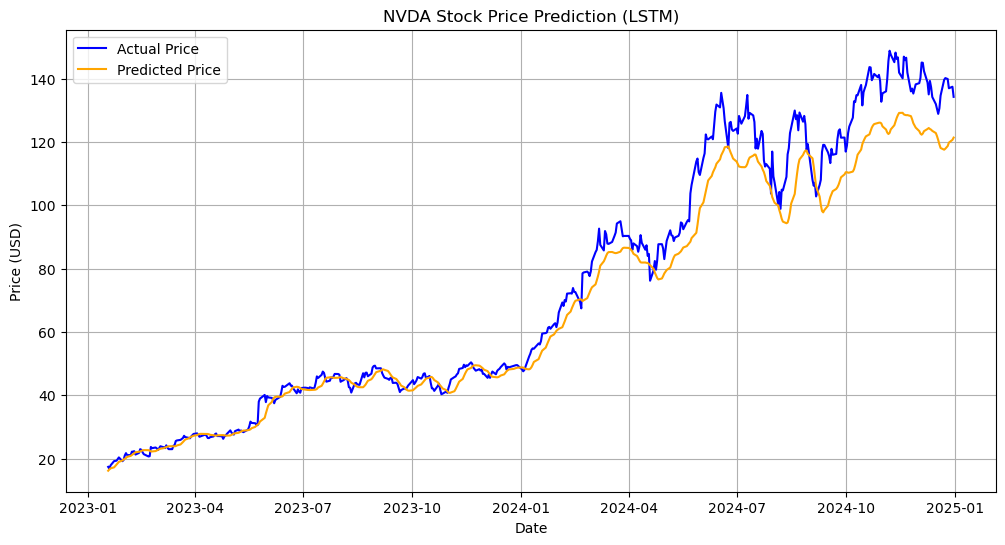

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_actual, label='Actual Price', color='blue')
plt.plot(dates, y_pred, label='Predicted Price', color='orange')
plt.title(f"{ticker} Stock Price Prediction (LSTM)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()